# Steel Defects Classification

In this section we will build a multi-class classifier to classify the type steel defect shown on an image. To mitigate the class-imbalance, during training we will augment the images and for every batch augmented we will over sample the minority classes to have better representation. To evaluate the performance of the model, we expecct the precision, recall and f1 scores to be similar. 

In [1]:
# main libraries
import numpy as np

# dataset
from steel_defects import steel_defects

# model
from defects_classifier import defects_classifier

# batch generator over sampler
from BalancedDataGenerator import BalancedDataGenerator

# image generator
from keras.preprocessing.image import ImageDataGenerator

# model training helpers
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

np.random.seed(42)

Using TensorFlow backend.


## Load Steel Defects Dataset

The images are preprocessed into a shape of 64 by 64 to gray scale, as a way to reduce the number of features. Noticed when each dataset is loaded into memory it also shows the number of each class. Clasnumber 3 has approximately 75 percent of the whole dataset. In other owrds, just by predicting class 3 the model can acheive an accuracy of 75 percent. Therefore, we need the model to generalize among each class as much as possible.

In [2]:
steel = steel_defects()

In [3]:
trn_dir = '~./imgs_multiClass/train'
tst_dir = '~./imgs_multiClass/test'
val_dir = '~./imgs_multiClass/valid'

In [4]:
# training data
tr_imgs, tr_lbls = steel.load_defects(trn_dir)

100%|██████████| 422/422 [00:01<00:00, 254.85it/s]


In [5]:
# validation data
vl_imgs, vl_lbls = steel.load_defects(val_dir)

100%|██████████| 42/42 [00:00<00:00, 240.56it/s]


In [6]:
# testing data
ts_imgs, ts_lbls = steel.load_defects(tst_dir)

100%|██████████| 52/52 [00:00<00:00, 243.85it/s]


## Data Preparation

To reduce the memory foot-print, to train the model we will use an image generator from keras. As mentioned above, an additional piece of code was added to balance the image generated during training. 

In [7]:
tr_generator = ImageDataGenerator(rescale=1.0/255, 
                            brightness_range=(0.2, 0.7), 
                            horizontal_flip=True, 
                            vertical_flip=True)

ts_generator = ImageDataGenerator(rescale=1.0/255)

ts_gen = ts_generator.flow(ts_imgs, ts_lbls, batch_size=32, seed=42)
vl_gen = ts_generator.flow(vl_imgs, vl_lbls, batch_size=32, seed=42)

bgen = BalancedDataGenerator(tr_imgs, tr_lbls, tr_generator, batch_size=32)

print('Number of steps per epoch {}'.format(bgen.steps_per_epoch))

Number of steps per epoch 481


## Model Training and Evaluation

In this part we will train model 

In [8]:
model_classifier = defects_classifier.make_model()

In [9]:
model_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)      

In [10]:
call_list = [
    ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=0, factor=0.04, min_lr=0.001),
    EarlyStopping(monitor='val_accuracy', patience=4)
]

In [11]:
np.random.seed(42)

history = model_classifier.fit_generator(bgen, 
                                           steps_per_epoch=481,
                                           validation_data=vl_gen,
                                           validation_steps=len(vl_imgs)//32,
                                           epochs=50,
                                           callbacks=call_list)

Epoch 1/50
481/481 [==============================] - 96s 200ms/step - loss: 1.0843 - accuracy: 0.5097 - val_loss: 1.1327 - val_accuracy: 0.4026
Epoch 2/50
481/481 [==============================] - 100s 208ms/step - loss: 0.9258 - accuracy: 0.6031 - val_loss: 0.9705 - val_accuracy: 0.4809
Epoch 3/50
481/481 [==============================] - 106s 220ms/step - loss: 0.8648 - accuracy: 0.6314 - val_loss: 0.8349 - val_accuracy: 0.4943
Epoch 4/50
481/481 [==============================] - 108s 225ms/step - loss: 0.8163 - accuracy: 0.6569 - val_loss: 1.0053 - val_accuracy: 0.4847
Epoch 5/50
481/481 [==============================] - 107s 223ms/step - loss: 0.7787 - accuracy: 0.6810 - val_loss: 0.8640 - val_accuracy: 0.5458
Epoch 6/50
481/481 [==============================] - 107s 223ms/step - loss: 0.7405 - accuracy: 0.6963 - val_loss: 1.0414 - val_accuracy: 0.5095
Epoch 7/50
481/481 [==============================] - 112s 233ms/step - loss: 0.7051 - accuracy: 0.7117 - val_loss: 0.6972 - 

In [12]:
print('Ahora si')

Ahora si


In [18]:
plots = defects_classifier()

NameError: name 'np' is not defined

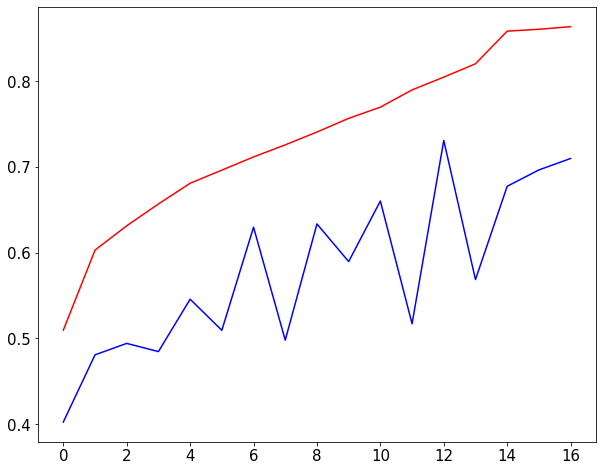

In [19]:
plots.plot_accuracy(history=history, title='Training CNN', x_width=1, label_size=15, save=False)